<a href="https://colab.research.google.com/github/MK316/Class_Spring2022/blob/main/Week09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📖 Week09 (6/7, Tuesday)

## #️⃣ Todo list:
1. Reading chapter: Chapter 6 Money and trade
2. Learning goals: 
* **Vocabulary** learning with sounds (N, V, Adj, Adv)
* Grammar: **verb tense** review practice
* Class activities with **English expressions**
* **Phonics - part 1**

https://raw.githubusercontent.com/MK316/Class_Spring2022/main/ch6.txt

## **[1] Chapter 06 Preview**

In [2]:
#@markdown 🚩 Paste the text in the box:
#@markdown File reading: (ch06.txt > text)

# copy a file from github

text = input()

About 9,500 years ago, ancient accountants in Sumer invented a way to keep tract of farmers' crops and livestock. They began using small pieces of baked clay, almost like the tokens used in board games today. One piece might signify a measure of grain, while another with a different shape might represent a farm animal or a jar of olive oil. Those little ceramic shapes might not seem to have much in common with today's $100 bill - or with the credit cards and online transactions that have rapidly taking the place of cash - but the roots of our modern methods of payment lie in those Sumerian tokens. Such early accounting tools evolved into a system of finance and into money itself: a symbolic representation of value that can be transferred from one person to another as payment for goods or services. Since ancient times, humans have used items to represent value - from stones to animal skins, to whale teeth. In the ancient world, people often relied upon symbols that had tangible value in

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


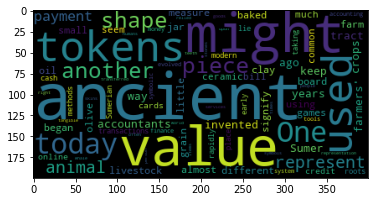

In [3]:
#@markdown 🔳 Wordcloud to show Ch06 content
import nltk
nltk.download("punkt")
nltk.download('gutenberg')

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wc = WordCloud().generate(text) 
plt.imshow(wc)

## **[2] Word reading**

In [4]:
#@markdown 🚩 {gTTS} package installation and import
%%capture
!pip install gTTS
from gtts import gTTS
from IPython.display import Audio

In [5]:
#@markdown 🚩 Getting ready to use { tts ( _text_to_say_) }:
def tts(mytext):

#Install gTTS
# !pip install gTTS
# from gtts import gTTS
# from IPython.display import Audio

  text_to_say = mytext

# Step ⓵ Language to choose:
  language_to_choose = "en" #@param ["en", "fr","ko",'es']
  Slow_speed = "True" #@param ["True","False"]
  # lang = language_to_choose

  print("Play language accent: %s"%language_to_choose)
  language = language_to_choose

# gTTS
  gtts_object = gTTS(text = text_to_say,
                     lang = language,
                    slow = Slow_speed)
  
# #@markdown Step ③: Create the audio file (.wav) to play:
  gtts_object.save("mytext.wav")

# # Output
  return Audio("mytext.wav")

https://raw.githubusercontent.com/MK316/Class_Spring2022/main/ch6.txt

In [8]:
#@markdown 🔳 Install package: {corpus-toolkit}

%%capture
!pip install corpus-toolkit

In [22]:
#@markdown 🔳 Tagging > Tagged file to csv

import os
os.mkdir("txtdata")

with open("txtdata/mytext.txt",'w') as f:
  f.write(text)

from corpus_toolkit import corpus_tools as ct

brown_corp = ct.ldcorpus("txtdata") #load and read text files under 'txtdata' directory
tok_corp = ct.tokenize(brown_corp)  #tokenize corpus - by default this lemmatizes as well
brown_freq = ct.frequency(tok_corp) #creates a frequency dictionary

# tagged_txt (tagged data folder), txtdata (original data folder)
ct.write_corpus("tagged_txt",ct.tag(ct.ldcorpus("txtdata")))

tagged_freq = ct.frequency(ct.reload("tagged_txt"))
ct.head(tagged_freq, hits = 10)

import pandas as pd

data_dict = tagged_freq
data_items = data_dict.items()
data_list = list(data_items)
df = pd.DataFrame(data_list)
df.columns = ['Words', 'Freq']
df = df.sort_values(by=['Freq'], ascending=False)
# print(df)

df.to_csv('/content/tagged.csv', index=False)

data = pd.read_csv('tagged.csv')
data.head()

Processing mytext.txt (1 of 1 files)
Processing mytext.txt (1 of 1 files)
Processing 1.txt (1 of 1 files)
of_ADP	9
a_DET	7
in_ADP	6
to_PART	5
the_DET	5
have_AUX	4
ancient_ADJ	3
and_CCONJ	3
use_VERB	3
may_VERB	3


,Words,Freq
0,of_ADP,9
1,a_DET,7
2,in_ADP,6
3,to_PART,5
4,the_DET,5


In [49]:
#@markdown 🔳 Import packages: {nltk}, stopwords
%%capture
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download("punkt")

from nltk.corpus import stopwords
nltk.download("stopwords")

#@markdown 🔳 Remove stopwords

words = list(data['Words'])
words = [w for w in words if len(w) > 2]
print('Total number of words before stopwords: %d'%len(words))

# words into lower case
wlist = []
for w in words:
  w1 = w.lower()
  wlist.append(w1)

words = wlist

words = [w for w in words if not w in stopwords.words('english')]
print('Total number of words after stopwords: %d'%len(words))

# Remove 's
words = [w for w in words if len(w)>2]
words

txt = ' '.join(words)

#@markdown 🔳 POS tagging and dataframe (df): mydata.csv
sub1 = list(data['Words'])

wlist = []
cat = []
for w in words:
  w1 = w.split("_")
  wlist.append(w1[0])
  cat.append(w1[1])
wlist

import pandas as pd

df = pd.DataFrame()

df["WORD"] = wlist
df['POS'] = cat

df1 = df.sort_values(by = ['POS'])
df1

# Select data (not determiner, subj, part, pronouns)
part1 = df1[df1["POS"] != "part"]
# and (df1['POS'] != "det") and (df1['POS'] != "pron")]
part2 = part1[part1['POS'] != "pron"]
ref = list(part2['POS'])
df = part2

df['ID'] = range(1,len(ref)+1)
df = df.reindex(['ID','POS','WORD'], axis=1)
df.to_csv('mydata.csv', index=False)
df

In [25]:
#@markdown 🔳 Word reading:

wlist = list(df['WORD'])

wlist1 = ".  ".join(wlist)
print(wlist)
tts(wlist1)



['sumerian', 'online', 'little', 'symbolic', 'ancient', 'modern', 'common', 'ceramic', 'olive', 'early', 'own', 'tangible', 'small', 'baked', 'different', 'such', 'much', 'from', 'to', 'of', 'for', 'with', 'into', 'in', 'about', 'often', 'almost', 'rapidly', 'ago', 'be', 'have', 'but', 'and', 'or', 'a', 'the', 'their', 'those', 'our', 'another', 'that', 'farm', 'person', 'board', 'game', 'cash', 'root', 'clay', 'place', 'credit', 'crop', 'bill', 'tract', 'way', 'accountant', 'year', 'measure', 'jar', 'grain', 'oil', 'transaction', 'card', 'livestock', 'farmer', 'item', 'service', 'accounting', 'tool', 'good', 'system', 'finance', 'money', 'method', 'representation', 'token', 'payment', 'animal', 'shape', 'piece', 'today', 'value', 'lie', 'skin', 'right', 'stone', 'symbol', 'time', 'people', 'human', 'world', 'tooth', 'one', '9,500', '100', "'", 'to', 'not', "'s", 'they', 'itself', 'sumer', 'while', 'as', 'like', 'upon', 'since', 'begin', 'use', 'may', 'represent', 'keep', 'can', 'take'

In [62]:
#@markdown 🔳 Verb tense: present - past - past participle(p.p)
list_to_play = "Verbs" #@param ["Auxiliary","Verbs"]
text_to_say = d1[list_to_play]

auxlist = ["be","have","can","may"]
verblist = ["begin","use","represent","keep","take","invent","rely","transfer","signify","seem","evolve"]

alist = "These are auxiliary verbs. " + ". ".join(auxlist)
vlist = "These are verbs to learn. " + ". ".join(verblist)
d1 = {'Auxiliary': alist, 'Verbs': vlist}

text_to_say = d1.get(list_to_play)
text_to_say

tts(text_to_say)


Play language accent: en


In [71]:
#@markdown 🔳 Verb tense: practice
# list_to_play = "" #@param ["","can","may"]
# text_to_say = d1[list_to_play]

# auxlist = ["be","have","can","may"]
verb = "can" #@param ["can","may","begin","use","represent","keep","take","invent","rely","transfer","signify","seem","evolve"]

vdict = {"can": "can, could, I can pass the exam. You could passed the exam.", "may": "may, might, You may pass the exam. You might pass the exam.",'begin': "begin, began, begun. It begins to rain. It began to rain. It has rained", "use": "use, used, used.", "represent": "represent, represented, represented.",'keep': "keep, kept, kept.","take": "take, took, taken", "invent": "invent, invented, invented","rely": "rely, relied, relied","transfer": "transfer, transferred, transferred","signify": "signify, signified, signified", "seem": "seem, seemed, seemed", "evolve": "evolved, evolved, evolved."}

text_to_say = vdict.get(verb)

tts(text_to_say)


Play language accent: en


## **[3]English vowels to learn (4 vowels)**

piece vs. piss
who'd vs. hood

In [ ]:
#@markdown 🔳 Target words to learn pronunciation:

vowel_in_word = "U_good" #@param ["i_piece", "I_skin", "u_root", "U_good"]

ivowel = ["piece", "need","meet", "seat","see","bean","mean","lead","believe","meal"]
iv = ".  ".join(ivowel)
uvowel = ["root","mood","who","rule","afternoon","food","suit","balloon","cool","moon"]
uv = ".  ".join(uvowel)
Ivowel = ["skin","fit","bit","hit","sit","little","silk","milk","hill","ill"]
Iv = ".  ".join(Ivowel)
Uvowel = ["good","book","cook","would","could","should","wood","wolf","woman","put"]
Uv = ".  ".join(Uvowel)
vlist = {'i_piece': iv, 'I_skin': Iv, 'u_root': uv, 'U_good': Uv}

text_to_say1 = vlist.get(vowel_in_word)
intro = "I'll be saying ten words that share the same vowel. Listen carefully. "

text_to_say = intro + text_to_say1
print(vlist[vowel_in_word])
tts(text_to_say)


good.  book.  cook.  would.  could.  should.  wood.  wolf.  woman.  put
Play language accent: en


In [ ]:
twowords = input()
tts(twowords)

piece and piss. piss and piece
Play language accent: en


## **[4] Sentence reading (3) and expressions**

In [ ]:
#@markdown 🔳 Sentence readings:

from nltk.tokenize import sent_tokenize
sents = sent_tokenize(text)
len(sents)

sent_id = "5"  #@param = [1, 2, 3, 4, 5, 6, 7]
sent_id = int(sent_id)
intro = "Okay, let me read the sentence for you. Listen carefully."

text_to_say = sents[sent_id-1]

text_to_say1 = intro + text_to_say
tts(text_to_say1)

Play language accent: en


In [ ]:
#@markdown 🔳 Whole sentence reading:
text_to_read = "Let me read the whole sentences now. Here it goes. " + text

tts(text_to_read)

Play language accent: en
